<a href="https://colab.research.google.com/github/cengaiyeung/20MA573/blob/master/src/hw06_part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Abstract**

you will learn Exact sampling of Brownian path and Geometric Brownian path
- Exact sampling of Brownian motion path
- Exact sampling of Geometric Brownian path

### **2.1 Brownian path**

Let time mesh $\Pi$ be of the form

$$\Pi = \{0 = t_{1} \leq t_{2} \leq \dots \leq t_{N} = T  \}.$$

We use 

$$<W, \Pi> = \{W(t): t \in \Pi \}$$

the projection of the Brownian path on $\Pi$. To have a simulation of Brownian path by random walk, one can iterate

$$W(t_{i+1}) = W(t_{i}) + \sqrt{t_{i+1} - t_{i}} Z_{i+1}.$$

#### **Example 1:**

Let uniform mesh be denoted by

$$\Pi_{T, N} = \{i T/N: i = 0, 1, \dots, N \} .$$

- Write the pseudocode.
- Prove that $\hat{W}$ is an exact sampling.
- Draw $10$ path simulations of $t \mapsto \frac{W(t)}{\sqrt{2t \log \log t}}$ on interval $t = [100, 110]$ with mesh size $h = 0.1$.

(2) 

Since $W_{t}$ is a Brownian motion, then we have $W_{t}$ has independent increment and $ \forall s<t$, $W_{t} - W_{s} \sim \mathcal{N}(0,t-s)$, 

Since $Z_{i} \sim \mathcal{N}(0,1)$, $Z_{i}$ is  $i.i.d$,   and  $\hat{W}(t_0) = \hat{W}(0) = 0$, then, 
$$\hat{W}(t_{i+1}) = \hat{W}(t_{i}) + \sqrt{t_{i+1} - t_{i}}Z_{i+1}$$

then, we have 

$$\hat{W}(t_{i+1}) - \hat{W}(t_{i}) \sim \mathcal{N}(0, t_{i+1} - t_{i})$$

and since $\hat{W}(t_{i})$ has independent increment and $\hat W(t_{0}) = 0$. Thus we have, $\hat{W}(t_{i}) \sim \mathcal{N}(0, t_{i})$. 

So, $\hat{W}$ is exact sampling of Brownian motion.

(3)



In [0]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as ss

In [0]:
def exactbm1d(t0,t1,n):
  W_list = np.zeros(n+1)
  W_list[0] = np.random.normal(0,np.sqrt(t0))
  h = (t1-t0)/n
  for i in range(n):
    Z = np.random.normal(0,1)
    W_list[i+1] = W_list[i] + np.sqrt(h) * Z
  return W_list

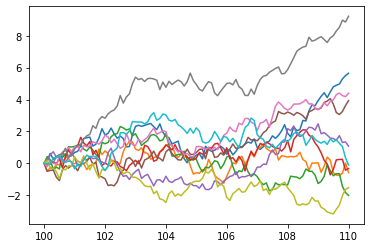

In [21]:
N = 100
p = 10
t = np.linspace(100,110,N+1)
for i in range(p):
  W = exactbm1d(0,10,N)
  plt.plot(t,W);

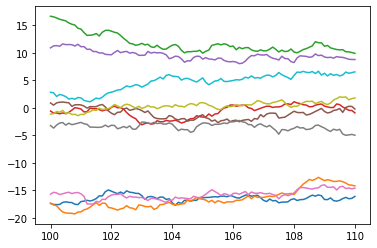

In [22]:
t0 = 100
t1 = 110
N = 100
p = 10
t = np.linspace(t0,t1,N+1)
for i in range(p):
  w = exactbm1d(100,110,N)
  plt.plot(t,w)

### **2.3 Application to Arithmetic asian option price**

Arithmetic asian call option with maturity $T$ and strick price $K$ has its pay off as 

$$C(T) = (A(T)- K)^{+},$$

where $A(T)$ is arithemtic average of the stock price at times $0 \leq t_{1} \leq t_{2} \leq \dots, t_{n}  = T$, i.e.

$$A(T) = \frac{1}{n} \sum_{n = 1}^{n} S(t_{i}).$$

The call price can be thus written by

$$C_{0} = \mathbb{E}^{\mathbb{Q}} [e^{-rT} (A(T) - K)^{+}].$$

Unlike the geometric asian option, arithmetic counterpart dose not have explict formula for its price. In this below, we shall use MC. In practice, an arithmetic asian option with a given number n of time steps takes the price average at $n+1$ points

$$t_{i} = (i-1) \frac{T}{n}, \quad i = 1, 2, 3, \dots, (n+1).$$

#### **Example 3:**

Consider Arithmatic asian option price on $BSM$ by exact sampling.

- Write a pseudocode for arithmetic asian price on BSM
- To the GBM class, add a method
$$arasian(otype, strike, maturity, nstep, npath)$$
for the price by exact sampling.
- Use your code to compute Arithmetic asian option of
$$s_{0} = 100, \sigma = 0.20, r = 0.0475, K = 110.0, T = 1.0, otype = 1, nstep = 5.$$